In [1]:
import numpy as np
import xarray as xr
from modules.crank_nicholson import crank_nicholson_1D
from modules.classes import Quantity1D, Analytic
import matplotlib.pyplot as plt
from scipy.linalg import solve, solve_banded

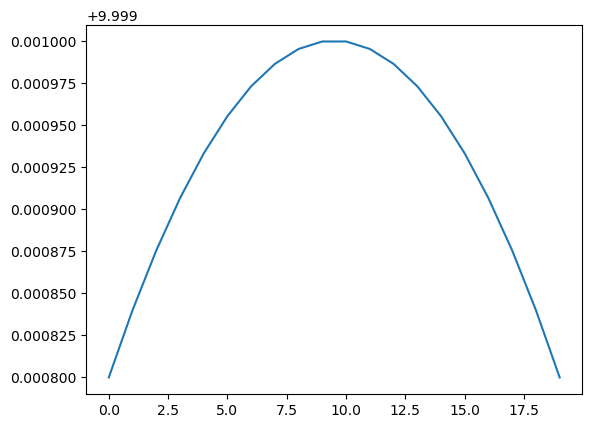

In [2]:
# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x)
diffusion.set_partial_x(lambda x, y: 1)
# Initialize the concentration object
# Note: Von Neumann Stability condition is (D * dt)/dx**2 < 0.5, else spurious decaying oscillations occur
n_grid = 20
n_time = 50
dt = 0.0001
dx = 0.001
conc = Quantity1D(
    n_grid,
    n_time,
    (0, n_grid*dx),
    (0, dt*n_time),
)
xcoords = conc.xcoords
initial_condition =  10*np.exp(- (10*n_grid*dx)*(xcoords - 0.5*dx*n_grid)**2)
#initial_condition = np.zeros_like(xcoords)
#initial_condition[n_grid//2] = 100
sources = np.zeros_like(xcoords)
sinks = np.zeros_like(xcoords)
#sources[8] = 1
#sinks[11] = 5
plt.plot(initial_condition)

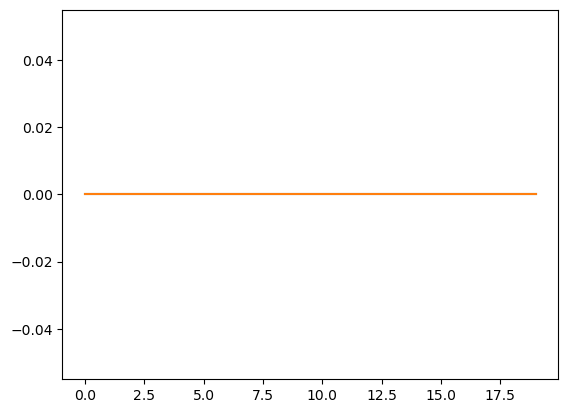

In [3]:
plt.plot(sources)
plt.plot(-sinks)

In [4]:
result_ds = crank_nicholson_1D(conc, diffusion, initial_condition, sources)

[[-1.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.02423469  1.09693878 -0.07270408  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.07270408  1.19387755 -0.12117347  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -0.12117347  1.29081633 -0.16964286  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -0.16964286  1.3877551  -0.21811224
   0.          0.         

In [5]:
result_ds

<xarray.DataArray 'concentration' (x: 20, t: 50)> Size: 8kB
array([[9.9998    , 9.99981105, 9.99981872, 9.99982623, 9.99983347,
        9.99984046, 9.99984719, 9.99985368, 9.99985991, 9.99986589,
        9.99987162, 9.9998771 , 9.99988233, 9.99988731, 9.99989203,
        9.99989651, 9.99990073, 9.9999047 , 9.99990842, 9.99991189,
        9.99991511, 9.99991809, 9.99992082, 9.9999233 , 9.99992555,
        9.99992756, 9.99992934, 9.99993089, 9.99993222, 9.99993332,
        9.99993422, 9.99993491, 9.99993539, 9.99993568, 9.99993578,
        9.9999357 , 9.99993543, 9.999935  , 9.99993439, 9.99993363,
        9.99993271, 9.99993164, 9.99993043, 9.99992908, 9.9999276 ,
        9.99992599, 9.99992426, 9.99992241, 9.99992045, 9.99991839],
       [9.99983989, 9.99984651, 9.99985296, 9.99985915, 9.9998651 ,
        9.99987079, 9.99987623, 9.99988142, 9.99988636, 9.99989105,
        9.99989549, 9.99989968, 9.99990363, 9.99990732, 9.99991077,
        9.99991397, 9.99991692, 9.99991964, 9.99992211, 9.99992435,
        9.99992636, 9.99992813, 9.99992968, 9.99993101, 9.99993212,
        9.99993302, 9.99993372, 9.99993421, 9.99993451, 9.99993462,
        9.99993455, 9.99993429, 9.99993387, 9.99993328, 9.99993253,
        9.99993162, 9.99993057, 9.99992937, 9.99992803, 9.99992657,
        9.99992497, 9.99992325, 9.99992142, 9.99991947, 9.99991742,
        9.99991526, 9.999913  , 9.99991065, 9.99990821, 9.99990569],
...
       [9.99983989, 9.99982828, 9.99981945, 9.99981097, 9.99980326,
        9.99979585, 9.99978881, 9.999782  , 9.99977543, 9.99976904,
        9.99976283, 9.99975676, 9.99975081, 9.99974499, 9.99973927,
        9.99973365, 9.99972811, 9.99972265, 9.99971727, 9.99971195,
        9.9997067 , 9.99970151, 9.99969636, 9.99969127, 9.99968623,
        9.99968122, 9.99967626, 9.99967134, 9.99966645, 9.9996616 ,
        9.99965678, 9.99965198, 9.99964722, 9.99964248, 9.99963776,
        9.99963307, 9.9996284 , 9.99962375, 9.99961912, 9.9996145 ,
        9.99960991, 9.99960533, 9.99960077, 9.99959622, 9.99959168,
        9.99958716, 9.99958265, 9.99957816, 9.99957367, 9.99956919],
       [9.9998    , 9.99979282, 9.99978495, 9.99977808, 9.99977119,
        9.99976472, 9.99975835, 9.99975221, 9.99974618, 9.99974031,
        9.99973454, 9.99972888, 9.99972331, 9.99971782, 9.99971242,
        9.99970709, 9.99970182, 9.99969661, 9.99969146, 9.99968636,
        9.9996813 , 9.9996763 , 9.99967133, 9.9996664 , 9.99966151,
        9.99965665, 9.99965183, 9.99964703, 9.99964226, 9.99963752,
        9.9996328 , 9.99962811, 9.99962344, 9.99961879, 9.99961416,
        9.99960954, 9.99960495, 9.99960037, 9.99959581, 9.99959126,
        9.99958672, 9.9995822 , 9.99957769, 9.9995732 , 9.99956871,
        9.99956423, 9.99955977, 9.99955531, 9.99955087, 9.99954643]])
Coordinates:
  * x        (x) float64 160B 0.0 0.001053 0.002105 ... 0.01789 0.01895 0.02
  * t        (t) float64 400B 0.0 0.000102 0.0002041 ... 0.004796 0.004898 0.005
Attributes:
    dx:                      0.0010526315789473684
    dt:                      0.00010204081632653062
    n_grid:                  20
    n_time:                  50
    initial_condition:       [9.9998     9.99983989 9.99987535 9.99990637 9.9...
    sources:                 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....
    diffusion_coefficients:  [0.         0.00105263 0.00210526 0.00315789 0.0...
    metadata:                Generated by crank_nicholson_1D

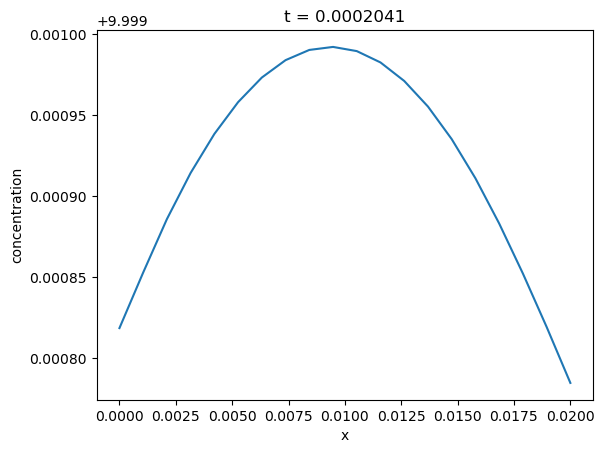

In [6]:
result_ds.isel(t=2).plot()

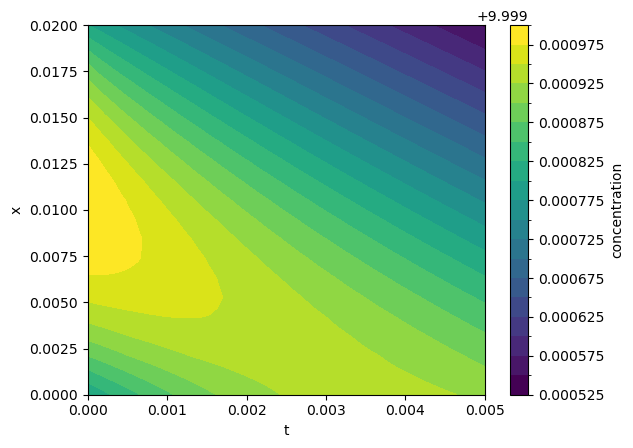

In [8]:
result_ds.plot.contourf(levels=20)